# 导入包

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.tsa as tsa
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读入数据
- 对数据进行读入操作
- 对数据进行异常值清洗
- 观测数据
## 对数据进行读入操作

In [4]:
# 读取名为 'Wikipedia.csv' 的数据文件
data = pd.read_csv('E:\PythonCode\DeepLearning\Time_Series\data\experment_02\Wikipedia.csv')

# 处理空数据：将0值替换为NaN，然后使用前向填充方法来填充NaN
data = data.mask(data == 0).fillna(method='ffill')

# 提取包含 '_es' 的页面数据，即包含 'es' 的相关数据
data = data[data['Page'].str.contains('_es')]

# 提取包含 'desktop' 和 'mobile-web' 的数据
desktop_df = data[data['Page'].str.contains('desktop')]
mobile_df = data[data['Page'].str.contains('mobile-web')]

# 创建一个新的数据框 df 用于存放求和后的数据
df = pd.DataFrame()

# 为 df 创建列名 'desktop' 和 'mobile'
df.columns = ['desktop', 'mobile']

# 计算 'desktop' 和 'mobile' 列的总和，并将结果存储到 df 中
df['desktop'] = desktop_df.iloc[:, 1:].sum()
df['mobile'] = mobile_df.iloc[:, 1:].sum()

# 打印数据集的信息
df.info()


ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

# 数据的可视化处理

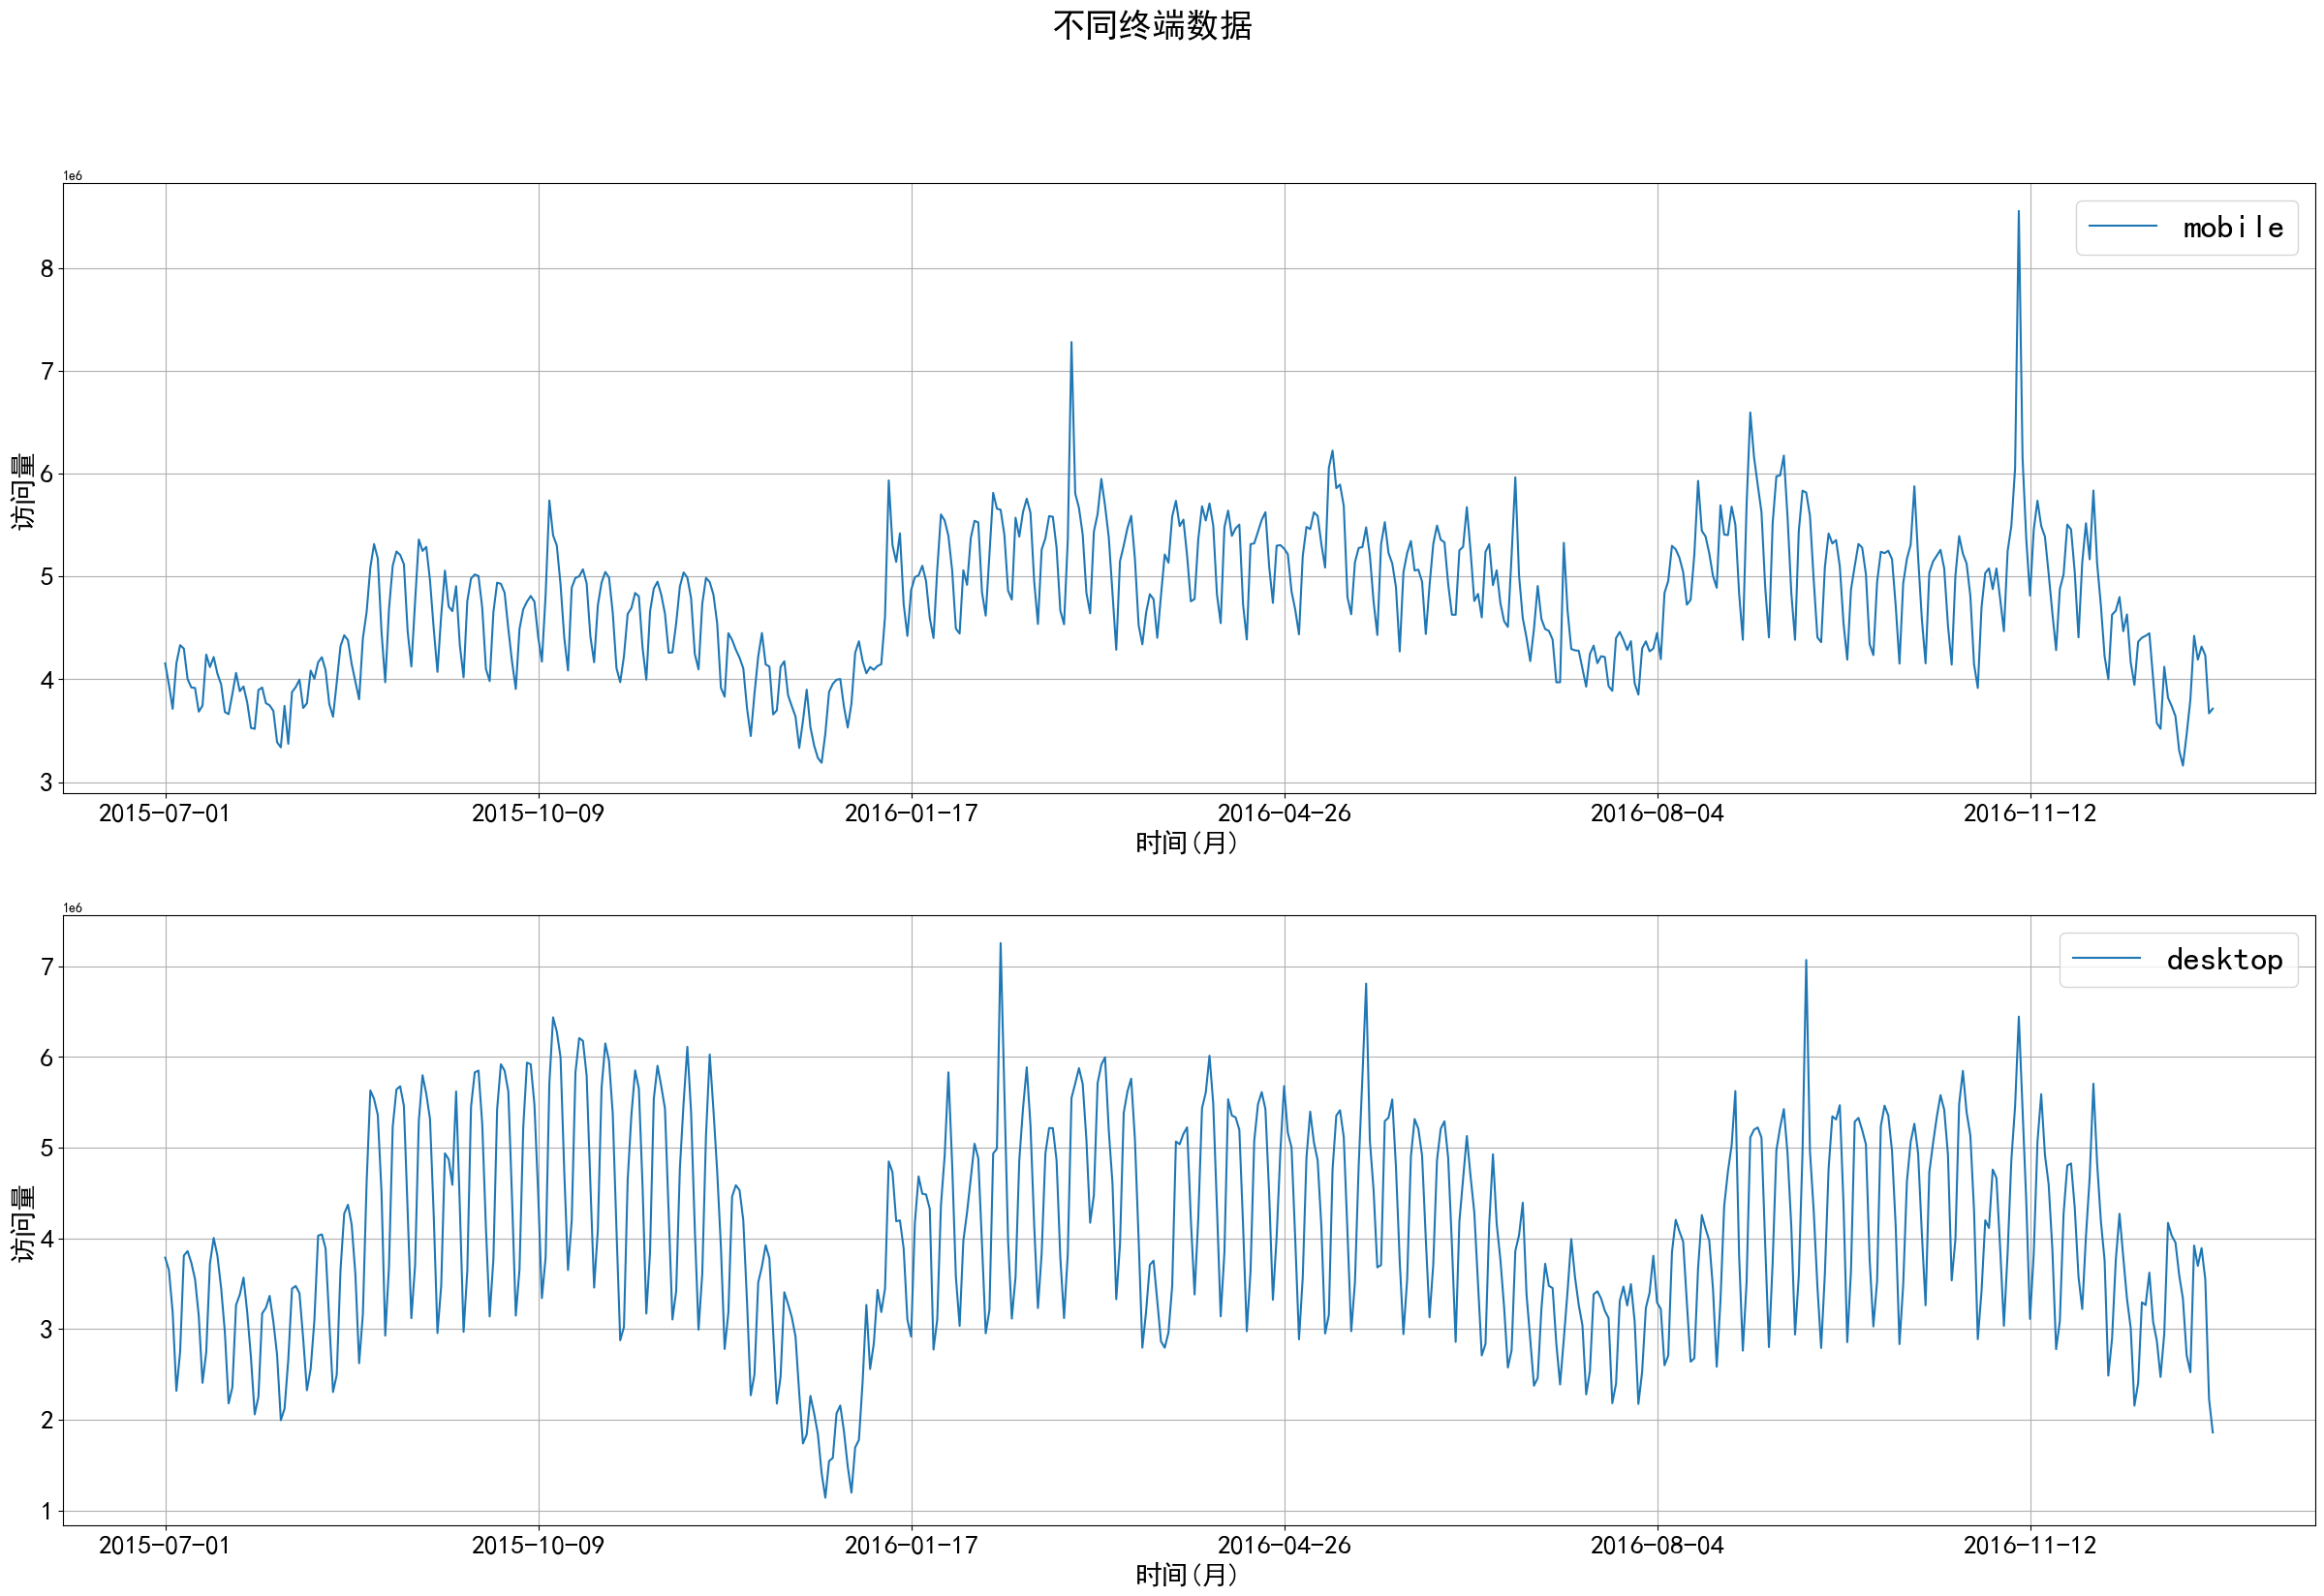

In [ ]:
# 创建一个包含2个子图的画布
fig, ax = plt.subplots(2, 1, figsize=(30, 18))
axes = ax.flatten()  # 将子图对象展平以便循环访问
fig.suptitle("不同终端数据", fontsize=25)  # 设置整个图的标题

# 获取DataFrame的列名
keys1 = df.keys()

# 遍历每个列名并绘制相应的数据
for key_index in range(len(keys1)):
    key = keys1[key_index]
    df[key].plot(ax=axes[key_index], fontsize=20)

# 设置子图的标签和图例
for index in axes:
    index.set_xlabel("时间(月)", fontsize=20)
    index.set_ylabel("访问量", fontsize=20)
    index.legend(loc='best', fontsize=25)
    index.grid()

# 提取 'mobile' 和 'desktop' 列数据
mobile = df.iloc[:, 1]
mobile.index = pd.to_datetime(mobile.index)
desktop = df.iloc[:, 0]
desktop.index = pd.to_datetime(desktop.index)


# 确认季节性和平稳性
## 确认季节性

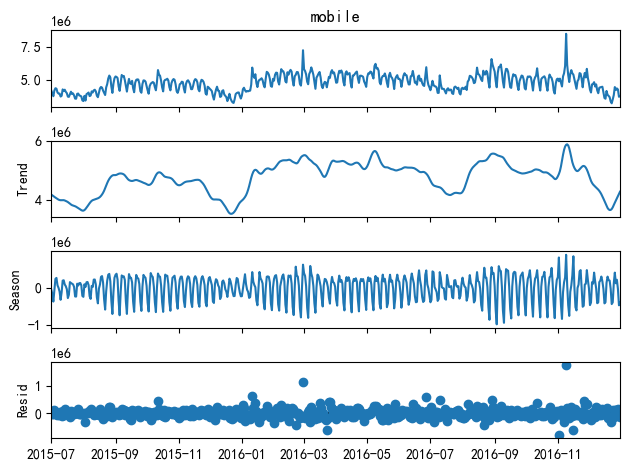

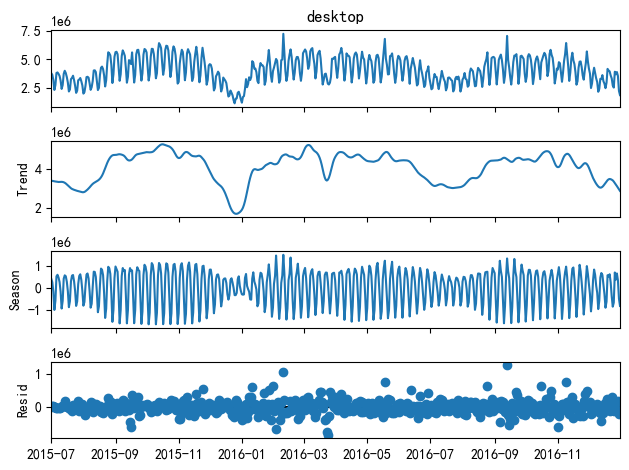

Test Statistic                 -2.788356
p-value                         0.059956
#Lag Used                      15.000000
Number of Observation Used    534.000000
Critical Value (1%)            -3.442655
Critical Value (5%)            -2.866968
Critical Value (10%)           -2.569661
dtype: float64
{'1%': -3.4426552678216003, '5%': -2.8669676577777548, '10%': -2.569660749624767}
不是平稳的
Test Statistic                 -2.999962
p-value                         0.034898
#Lag Used                      15.000000
Number of Observation Used    534.000000
Critical Value (1%)            -3.442655
Critical Value (5%)            -2.866968
Critical Value (10%)           -2.569661
dtype: float64
{'1%': -3.4426552678216003, '5%': -2.8669676577777548, '10%': -2.569660749624767}
不是平稳的


False

In [ ]:
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
# 测验平稳性
def test_stationarity(timeseries, alpha=1e-3):
    # 使用 Augmented Dickey-Fuller 测试进行平稳性检验
    dftest = adfuller(timeseries, autolag='AIC')
    
    # 将测试结果包装成一个 pandas Series
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lag Used', 'Number of Observation Used'])
    
    # 将临界值添加到结果中
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    
    print(dfoutput)
    print(dftest[4])
    
    # 提取关键的统计量
    critical_value = dftest[4]['5%']
    test_statistic = dftest[0]
    pvalue = dftest[1]
    
    # 根据 p-value 和测试统计量判断平稳性
    if pvalue < alpha and test_statistic < critical_value:
        print("X 是平稳的")
        return True
    else:
        print("不是平稳的")
        return False    

# 绘图函数
def F_STL(data):
    # 使用 Seasonal-Trend decomposition using LOESS (STL) 进行时间序列分解
    res = STL(data).fit()
    
    # 绘制分解后的时间序列图
    res.plot()
    plt.show()
    
    # 提取趋势、季节性和残差部分
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    return trend, seasonal, residual

# 对 'mobile' 和 'desktop' 数据进行时间序列分解和平稳性检验
F_STL(mobile)
F_STL(desktop)
test_stationarity(mobile)
test_stationarity(desktop)


可见数据周期性均为15
## 平稳性检测
### 桌面端

In [ ]:
# 对 'desktop' 数据进行一阶差分
desktop_diff1 = desktop.diff(1)

# 对一阶差分后的数据进行12步差分（季节性差分）
desktop_seasonal = desktop_diff1.diff(15)  # 假设每个季度有15个时间步长

# 对季节性差分后的数据进行平稳性检验
test_stationarity(desktop_seasonal.dropna())


Test Statistic               -1.007837e+01
p-value                       1.206824e-17
#Lag Used                     1.900000e+01
Number of Observation Used    5.140000e+02
Critical Value (1%)          -3.443136e+00
Critical Value (5%)          -2.867179e+00
Critical Value (10%)         -2.569774e+00
dtype: float64
{'1%': -3.443136494643789, '5%': -2.8671794725841147, '10%': -2.5697736283668187}
X 是平稳的


True

### 移动端处理

In [ ]:
# 对 'mobile' 数据进行一阶差分
mobile_diff1 = mobile.diff(1)

# 对一阶差分后的数据进行12步差分（季节性差分），假设每个季度有15个时间步长
mobile_seasonal = mobile_diff1.diff(15)

# 对季节性差分后的数据进行平稳性检验，使用之前定义的 `test_stationarity` 函数
test_stationarity(mobile_seasonal.dropna())


Test Statistic               -8.881570e+00
p-value                       1.313644e-14
#Lag Used                     1.900000e+01
Number of Observation Used    5.140000e+02
Critical Value (1%)          -3.443136e+00
Critical Value (5%)          -2.867179e+00
Critical Value (10%)         -2.569774e+00
dtype: float64
{'1%': -3.443136494643789, '5%': -2.8671794725841147, '10%': -2.5697736283668187}
X 是平稳的


True

## 噪声检验
### 桌面端

In [ ]:
import statsmodels.api as sm

# 白噪声检测函数
def test_white_noise(data):
    # 使用Ljung-Box检验检测数据是否为白噪声
    result = sm.stats.acorr_ljungbox(data.dropna(), return_df=True)
    return result

# 对 `desktop_seasonal` 数据进行白噪声检测
white_noise_test_result = test_white_noise(desktop_seasonal)


,lb_stat,lb_pvalue
1,7.040645,7.968031e-03
2,78.882238,7.429160e-18
3,98.189152,3.809129e-21
4,125.641875,3.327949e-26
5,181.159634,3.025298e-37
6,206.407131,8.204200e-42
7,483.465432,2.871268e-100
8,493.365512,1.864651e-101
9,554.022775,1.527856e-113
10,580.561322,2.569077e-118


小于阈值0.01为非白噪声序列
### 移动端

In [ ]:
# 对 `mobile_seasonal` 数据进行白噪声检测
test_white_noise(mobile_seasonal)

,lb_stat,lb_pvalue
1,5.767555,1.632473e-02
2,78.586010,8.615187e-18
3,78.763878,5.651416e-17
4,78.793472,3.137338e-16
5,114.501112,4.578900e-23
6,115.133446,1.711939e-22
7,232.912775,1.193461e-46
8,232.982949,6.924017e-46
9,262.650856,2.119864e-51
10,262.789772,1.104968e-50


小于阈值0.01为非白噪声序列
# 建立SARIMA模型
## 图解法定阶
### 对桌面端定阶

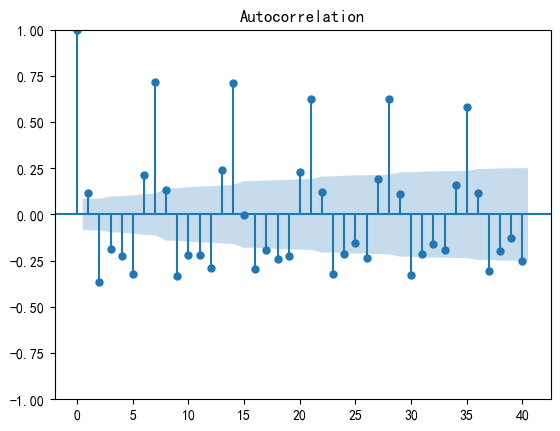

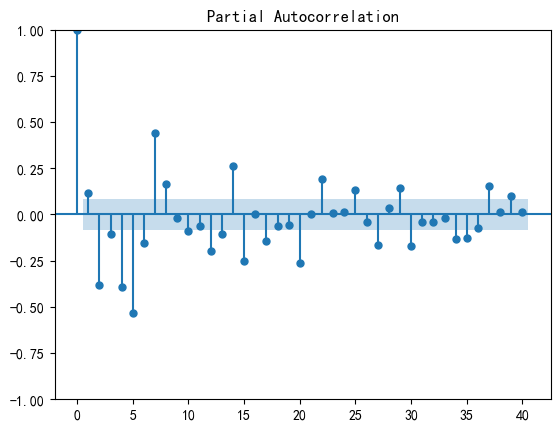

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制自相关函数（ACF）和偏自相关函数（PACF）图的函数
def ACF_PACF(seasonal):
    # 绘制 ACF 图
    fig_acf = plot_acf(seasonal.dropna(), lags=40)
    
    # 绘制 PACF 图
    fig_pacf = plot_pacf(seasonal.dropna(), lags=40)
    
    # 显示图形
    fig_acf.show()
    fig_pacf.show()

# 对 `desktop_seasonal` 数据绘制 ACF 和 PACF 图
ACF_PACF(desktop_seasonal)


ACF、PACF 均缓慢拖尾
### 移动端定阶


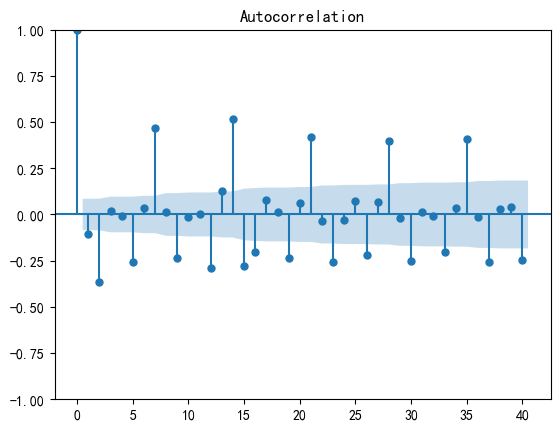

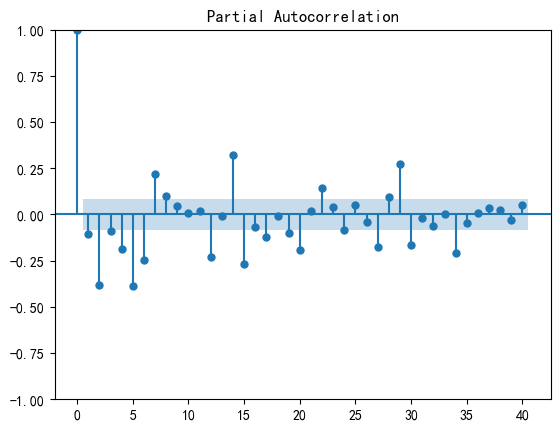

In [ ]:
# 对 `mobile_seasonal` 数据绘制 ACF 和 PACF 图
ACF_PACF(mobile_seasonal)

ACF、PACF 均缓慢拖尾
## 网格法搜索

In [ ]:
import itertools

# 定义 SARIMA 模型的网格搜索函数
def grid_search(data):
    # 定义要搜索的参数空间
    p = q = range(0, 3)
    s = [15]  # 季节性周期，假设为15
    d = [1]   # 一阶差分
    
    # 生成所有可能的参数组合
    PDQs = list(itertools.product(p, d, q, s))
    pdq = list(itertools.product(p, d, q))
    
    # 初始化存储结果的列表
    params = []
    seasonal_params = []
    results = []
    
    # 创建一个空的 DataFrame 用于存储网格搜索结果
    grid = pd.DataFrame()
    
    # 遍历参数空间中的所有组合
    for param in pdq:
        for seasonal_param in PDQs:
            # 创建 SARIMA 模型
            mod = tsa.statespace.sarimax.SARIMAX(data, order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            
            # 拟合模型
            result = mod.fit()
            
            # 打印每个组合的 AIC 值
            print("ARIMA{}x{}-AIC:{}".format(param, seasonal_param, result.aic))
            
            # 存储参数和结果
            params.append(param)
            seasonal_params.append(seasonal_param)
            results.append(result.aic)
    
    # 将参数和结果添加到 DataFrame
    grid['pdq'] = params
    grid['PDQs'] = seasonal_params
    grid['aic'] = results
    
    # 找到具有最低 AIC 值的参数组合
    best_params = grid[grid['aic'] == grid['aic'].min()]
    print(best_params)


### 桌面端

In [ ]:
# 对桌面端数据进行搜索
grid_serch(desktop)

ARIMA(0, 1, 0)x(0, 1, 0, 15)-AIC:16124.17681584792
ARIMA(0, 1, 0)x(0, 1, 1, 15)-AIC:15630.321072468028
ARIMA(0, 1, 0)x(0, 1, 2, 15)-AIC:15052.397409843044
ARIMA(0, 1, 0)x(1, 1, 0, 15)-AIC:15710.609126456298
ARIMA(0, 1, 0)x(1, 1, 1, 15)-AIC:15555.764438037595
ARIMA(0, 1, 0)x(1, 1, 2, 15)-AIC:15052.258968022397
ARIMA(0, 1, 0)x(2, 1, 0, 15)-AIC:15210.771558014421
ARIMA(0, 1, 0)x(2, 1, 1, 15)-AIC:15038.907002254256
ARIMA(0, 1, 0)x(2, 1, 2, 15)-AIC:14940.646501488602
ARIMA(0, 1, 1)x(0, 1, 0, 15)-AIC:16075.328945763033
ARIMA(0, 1, 1)x(0, 1, 1, 15)-AIC:15519.772432905993
ARIMA(0, 1, 1)x(0, 1, 2, 15)-AIC:15026.952050583319
ARIMA(0, 1, 1)x(1, 1, 0, 15)-AIC:15677.291128346042
ARIMA(0, 1, 1)x(1, 1, 1, 15)-AIC:15497.999203625048
ARIMA(0, 1, 1)x(1, 1, 2, 15)-AIC:15027.389808770718
ARIMA(0, 1, 1)x(2, 1, 0, 15)-AIC:15189.867553298267
ARIMA(0, 1, 1)x(2, 1, 1, 15)-AIC:15073.126886743896
ARIMA(0, 1, 1)x(2, 1, 2, 15)-AIC:14958.690335677573
ARIMA(0, 1, 2)x(0, 1, 0, 15)-AIC:15912.640183783169
ARIMA(0, 1, 2

桌面端最优参数为  (2, 1, 2)  (2, 1, 2, 15)  14782.248469
### 移动端

In [ ]:
# 对移动端数据进行搜索
grid_serch(mobile)

ARIMA(0, 1, 0)x(0, 1, 0, 15)-AIC:15625.037273515105
ARIMA(0, 1, 0)x(0, 1, 1, 15)-AIC:15038.873946452242
ARIMA(0, 1, 0)x(0, 1, 2, 15)-AIC:14585.82750777362
ARIMA(0, 1, 0)x(1, 1, 0, 15)-AIC:15185.467318073257
ARIMA(0, 1, 0)x(1, 1, 1, 15)-AIC:15030.641203491996
ARIMA(0, 1, 0)x(1, 1, 2, 15)-AIC:14574.879541072269
ARIMA(0, 1, 0)x(2, 1, 0, 15)-AIC:14685.252151208137
ARIMA(0, 1, 0)x(2, 1, 1, 15)-AIC:14592.864317602041
ARIMA(0, 1, 0)x(2, 1, 2, 15)-AIC:14565.394971220163
ARIMA(0, 1, 1)x(0, 1, 0, 15)-AIC:15567.550809797933
ARIMA(0, 1, 1)x(0, 1, 1, 15)-AIC:15020.917310797433
ARIMA(0, 1, 1)x(0, 1, 2, 15)-AIC:14571.038054612693
ARIMA(0, 1, 1)x(1, 1, 0, 15)-AIC:15186.018950563437
ARIMA(0, 1, 1)x(1, 1, 1, 15)-AIC:15017.362729946291
ARIMA(0, 1, 1)x(1, 1, 2, 15)-AIC:14562.594811954157
ARIMA(0, 1, 1)x(2, 1, 0, 15)-AIC:14691.377430205845
ARIMA(0, 1, 1)x(2, 1, 1, 15)-AIC:14620.184493708477
ARIMA(0, 1, 1)x(2, 1, 2, 15)-AIC:14563.163837626611
ARIMA(0, 1, 2)x(0, 1, 0, 15)-AIC:15435.486678626625
ARIMA(0, 1, 2

移动端最优参数为  (2, 1, 2)  (2, 1, 1, 15)  14377.15391
# 建立模型
## 桌面端

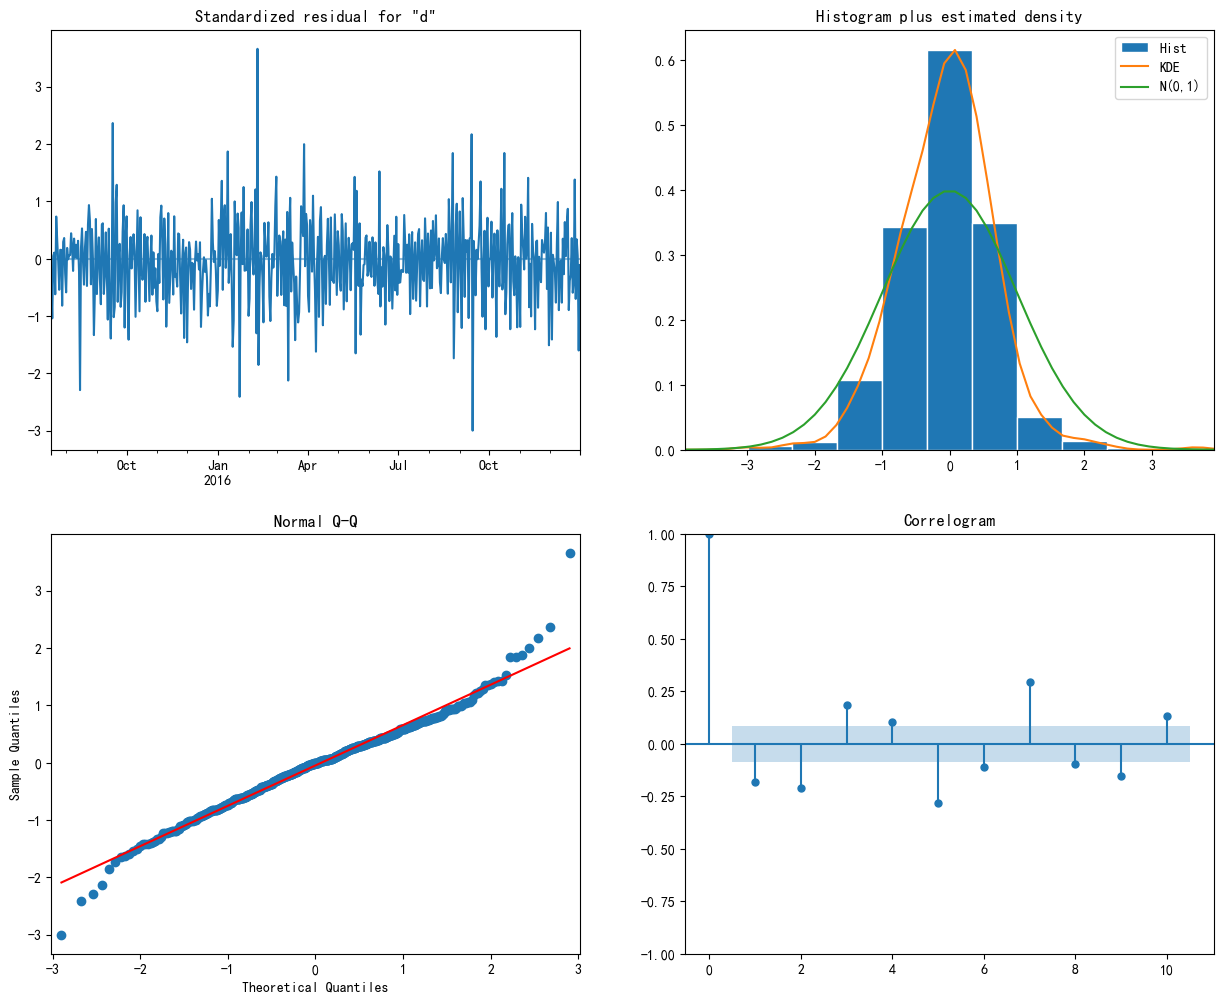

In [ ]:
# 创建 SARIMA 模型并拟合数据
mod = tsa.statespace.sarimax.SARIMAX(desktop, order=(2, 1, 2), seasonal_order=(2, 1, 2, 15))
desktop_results = mod.fit()

# 对模型的残差进行白噪声检测
test_white_noise(desktop_results.resid)

# 绘制模型的诊断图
fig_result = desktop_results.plot_diagnostics(figsize=(15, 12))


## 移动端

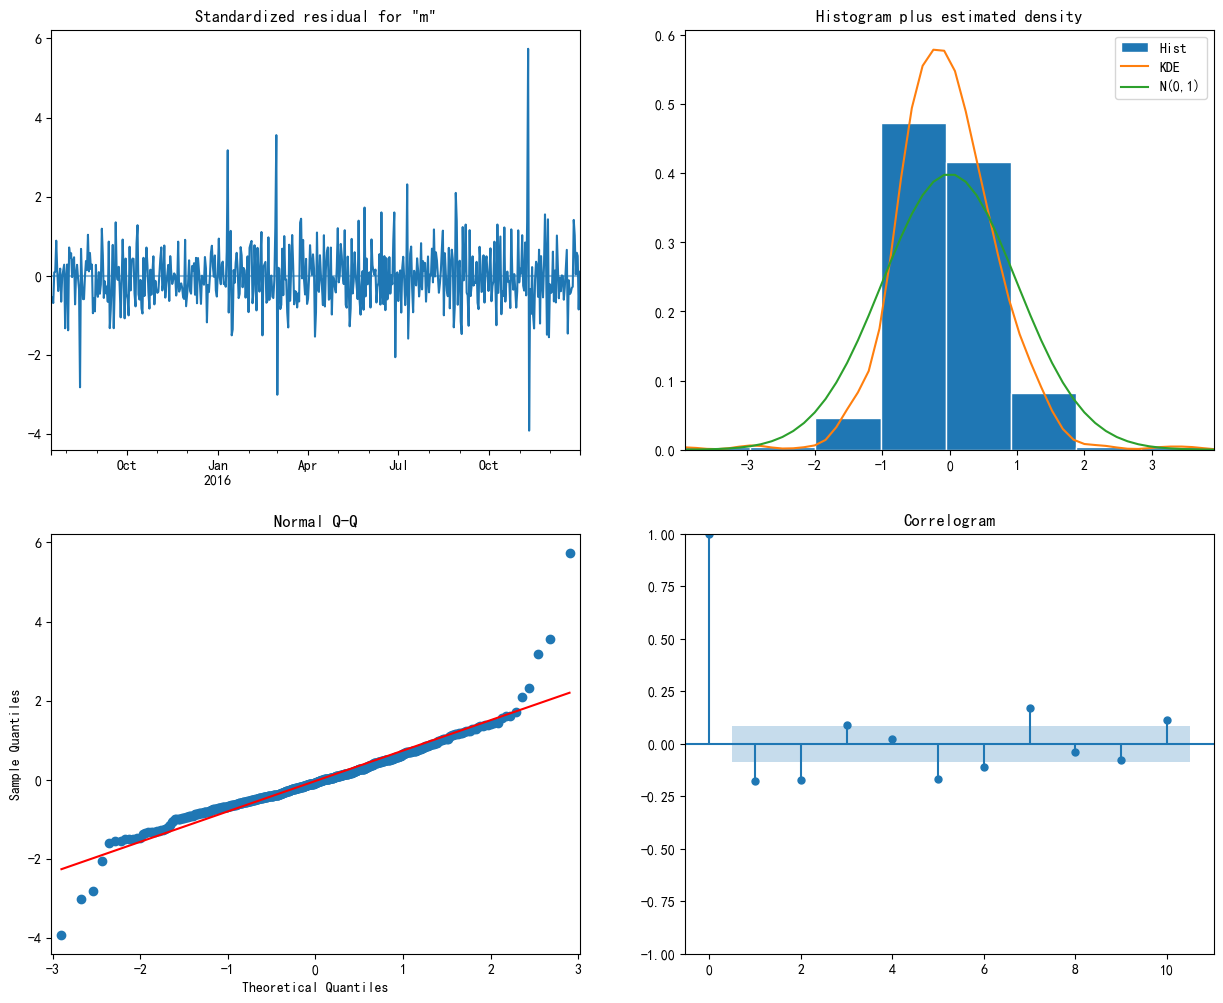

In [ ]:
# 创建 SARIMA 模型并拟合数据
mod = tsa.statespace.sarimax.SARIMAX(mobile, order=(2, 1, 2), seasonal_order=(2, 1, 1, 15))
mobile_results = mod.fit()

# 对模型的残差进行白噪声检测
test_white_noise(mobile_results.resid)

# 绘制模型的诊断图
fig_result = mobile_results.plot_diagnostics(figsize=(15, 12))


# 模型预测
## 桌面端

RMSE:189989649981.4174
RMSE:435878.02190683736
RMSE:1186716510739.5415
RMSE:1089365.187042225
单步预测


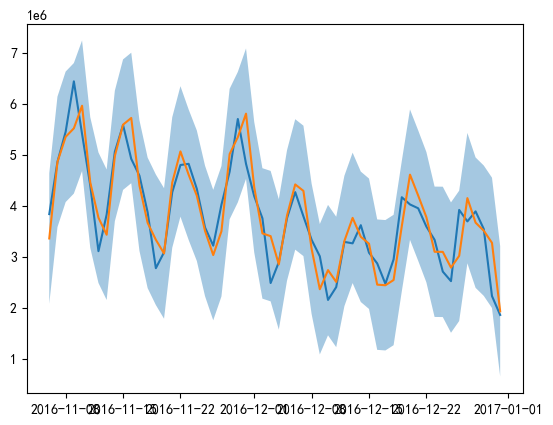

多步预测


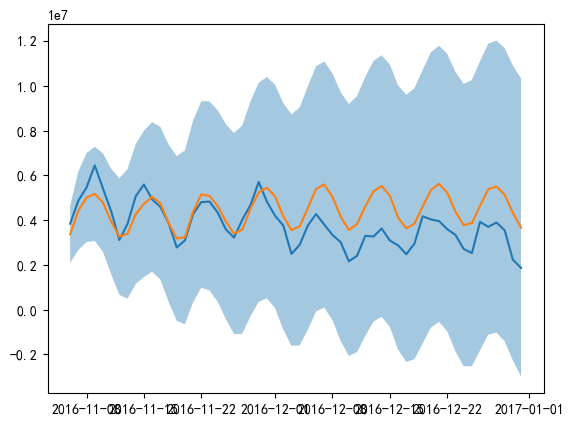

In [ ]:
from sklearn.metrics import mean_squared_error

# 获取模型预测结果
def get_prediction(data, results, start, dynamic=False):
    # 使用模型进行预测
    pred = results.get_prediction(start=start, dynamic=dynamic, full_results=True)
    pred_ci = pred.conf_int()
    forecast = pred.predicted_mean
    truth = data[start:]
    
    # 创建包含真实值、预测值和置信区间的 DataFrame
    pred_concat = pd.concat([truth, forecast, pred_ci], axis=1)
    pred_concat.columns = ['true', 'pred', 'up', 'low']
    
    # 计算均方误差和均方根误差
    mse = mean_squared_error(truth, forecast)
    rmse = np.sqrt(mse)
    print('均方误差 (MSE): {}'.format(mse))
    print('均方根误差 (RMSE): {}'.format(rmse))
    
    return pred_concat

# 绘制预测结果的函数
def plot_prediction(pred_concat):
    plt.fill_between(pred_concat.index, pred_concat['up'], pred_concat['low'], alpha=0.4, label='预测范围')
    plt.plot(pred_concat['true'], label='真实值')
    plt.plot(pred_concat['pred'], label='预测值')
    plt.legend()
    plt.show()

# 预测函数
def predict(data, results):
    # 单步预测
    pres_1 = get_prediction(data, results, '2016-11-06')
    
    # 多步预测（动态预测）
    pres_2 = get_prediction(data, results, '2016-11-06', dynamic=True)
    
    print("单步预测结果")
    plot_prediction(pres_1)
    print("多步预测结果")
    plot_prediction(pres_2)

# 对 'desktop' 数据进行预测和可视化
predict(desktop, desktop_results)


## 移动端

RMSE:321607617376.8563
RMSE:567104.5912147567
RMSE:721710299594.3995
RMSE:849535.3433462315
单步预测


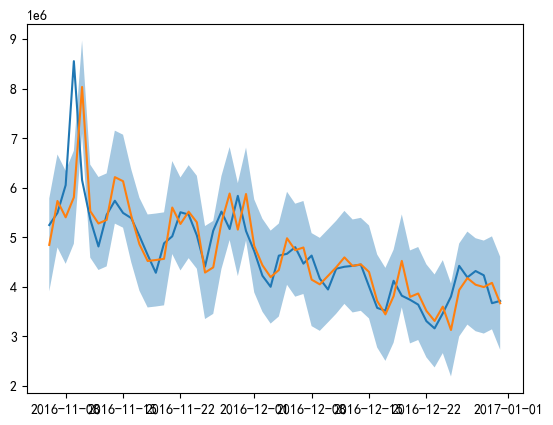

多步预测


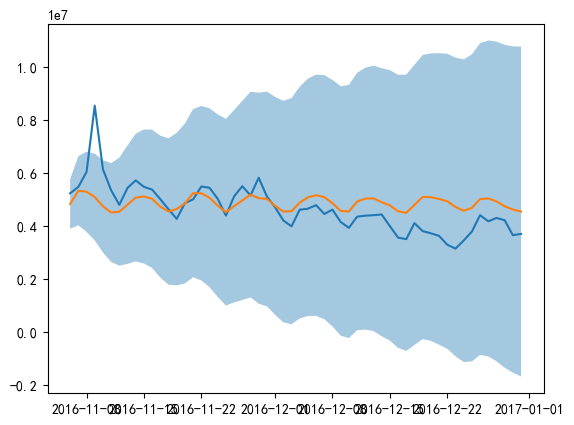

In [ ]:
# 对 'mobile' 数据进行预测和可视化
pre(mobile,mobile_results)

# 最终预测结果展示
## 桌面端

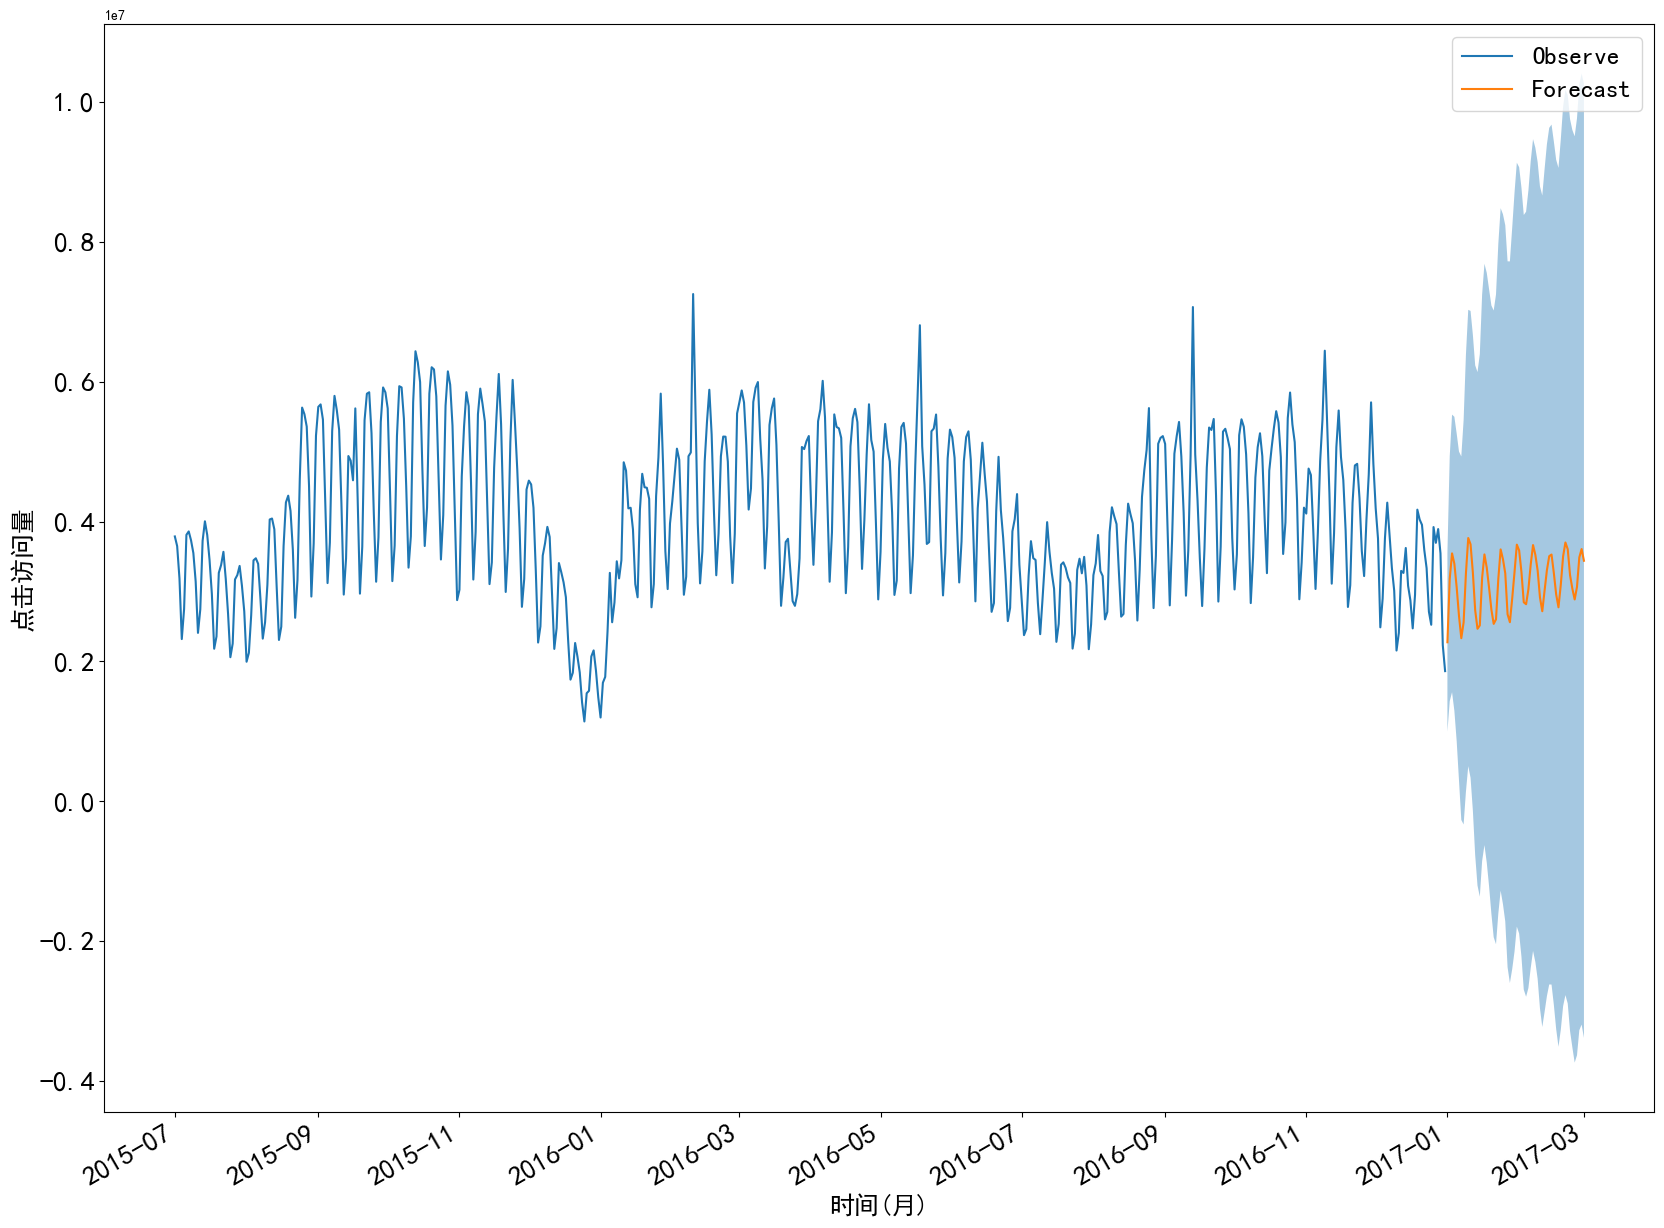

In [ ]:
# 显示 SARIMA 模型的预测结果
def show(results, data):
    # 获取未来的预测值，这里设置了预测未来60个时间步长
    forecast = results.get_forecast(steps=60)
    
    # 创建绘图对象
    fig, ax = plt.subplots(figsize=(20, 16))
    
    # 绘制观测值
    ax.plot(data, label='观测值')
    
    # 绘制预测值
    forecast.predicted_mean.plot(ax=ax, label='预测值')
    
    # 绘制置信区间
    ax.fill_between(forecast.conf_int().index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], alpha=0.4)
    
    # 设置坐标轴标签和图例
    ax.set_xlabel("时间(月)", fontsize=18)
    ax.set_ylabel("点击访问量", fontsize=18)
    ax.legend(loc='best', fontsize=18)
    
    # 设置坐标轴刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # 显示图形
    plt.show()

# 显示 'desktop' 数据的 SARIMA 模型预测结果
show(desktop_results, desktop)


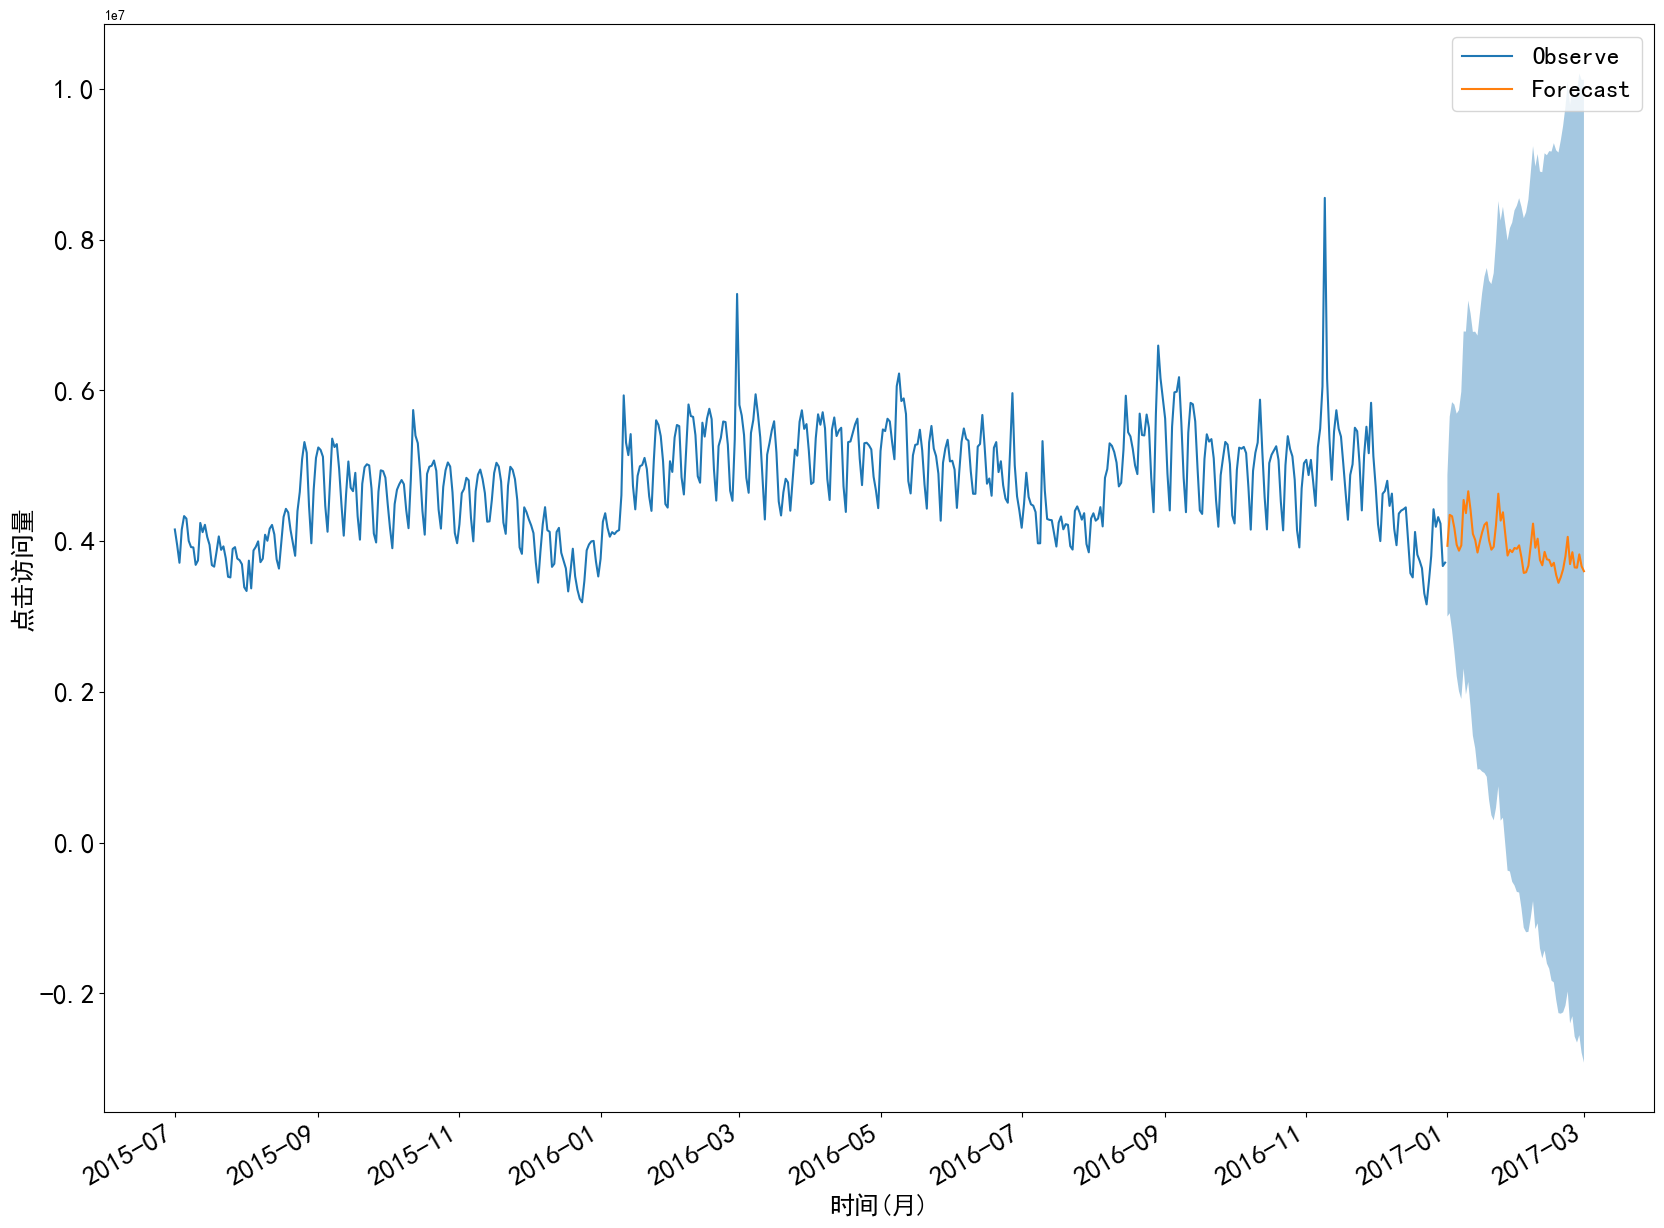

In [ ]:
# 显示 'mobile' 数据的 SARIMA 模型预测结果
show(mobile_results,mobile)

# 对比实验

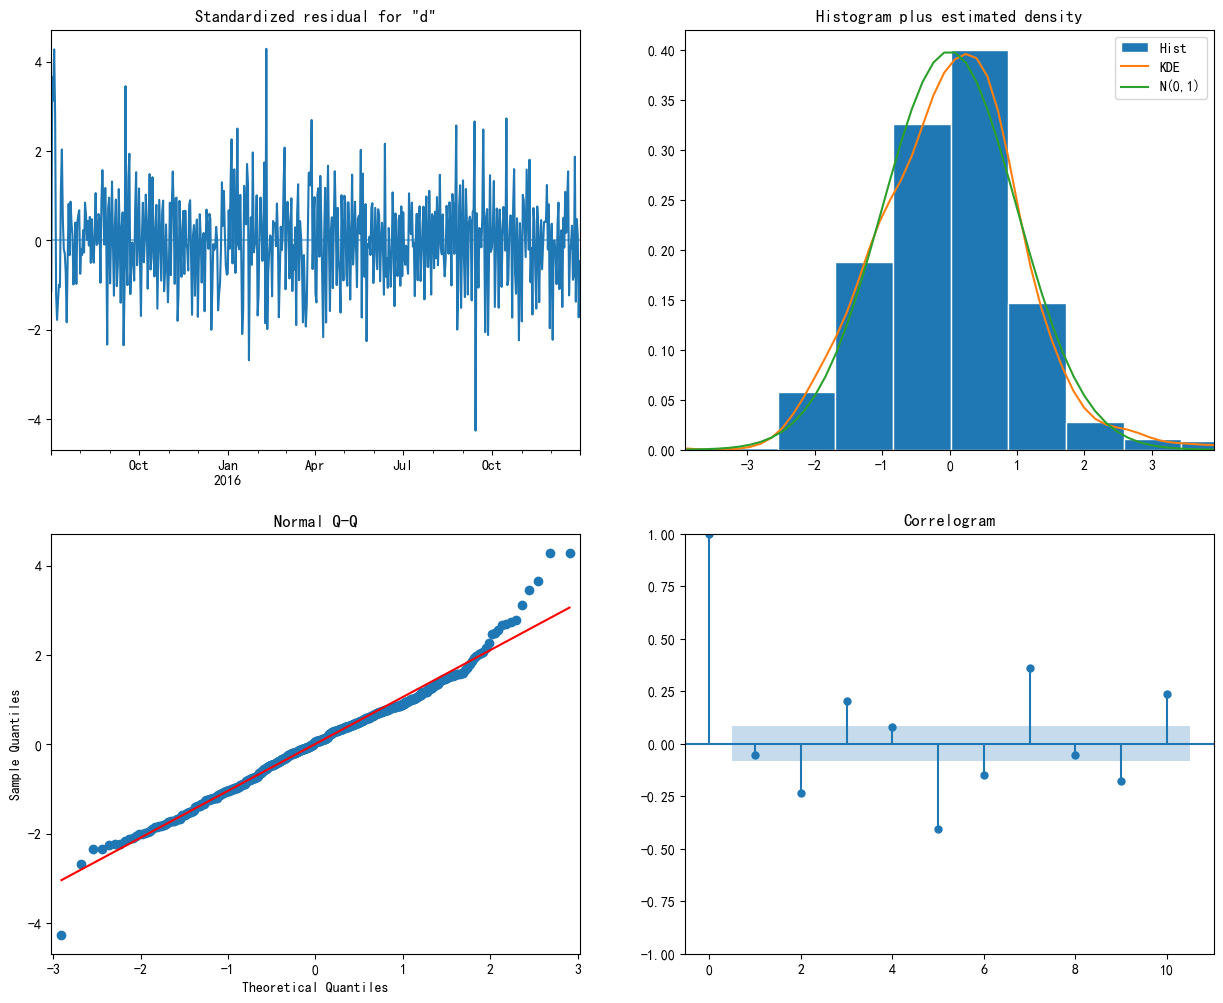

In [ ]:
# 创建 ARIMA 模型并拟合数据
mod = sm.tsa.arima.ARIMA(desktop, order=(2, 1, 2))  
desktop_results_arima = mod.fit(method='innovations_mle')

# 对模型的残差进行白噪声检测
test_white_noise(desktop_results_arima.resid)

# 绘制模型的诊断图
fig_result = desktop_results_arima.plot_diagnostics(figsize=(15, 12))


RMSE:1262023341361.9783
RMSE:1123398.1223778052
RMSE:1390257403356.7031
RMSE:1179091.7705406577
单步预测


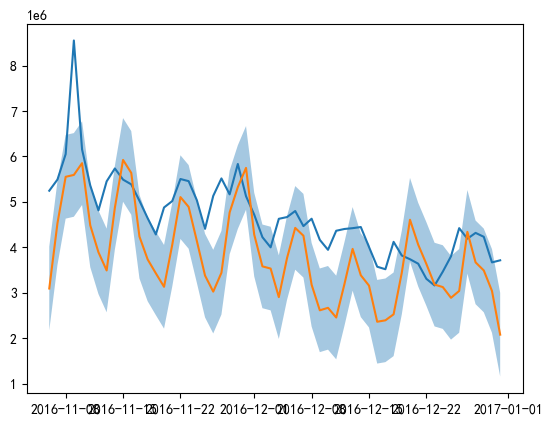

多步预测


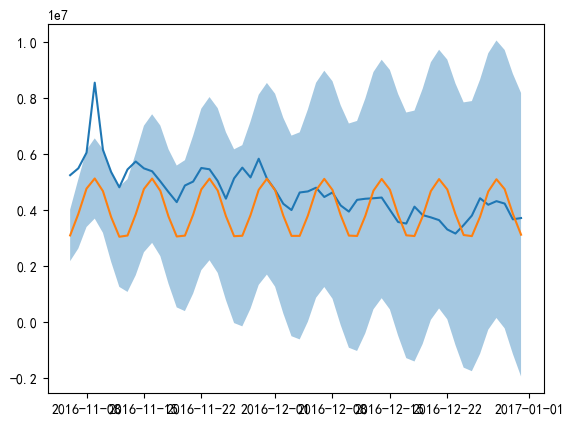

RMSE:1251006097003.8262
RMSE:1118483.8385081056
RMSE:1203637530972.05
RMSE:1097104.1568474937
单步预测


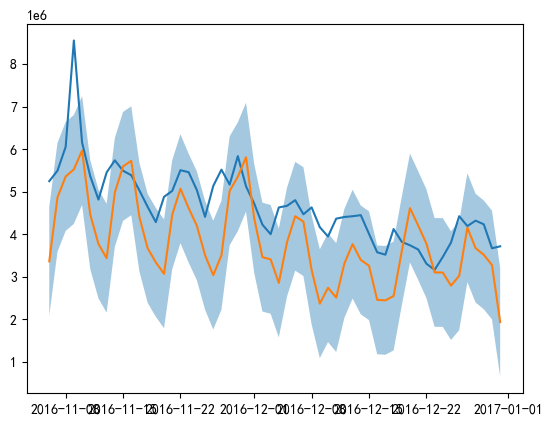

多步预测


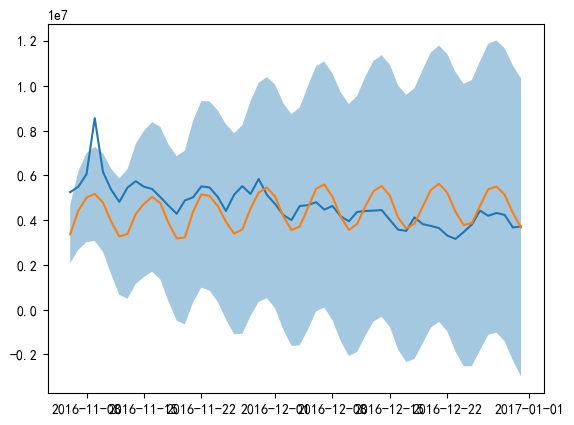

In [ ]:
pre(mobile,desktop_results_arima)
pre(mobile,desktop_results)


- SARIMA 1262023341361.9783
- ARIMA 1251006097003.8262


可以看到SARIMA模型性能优于ARIMA性能


说明模型具有较高的准确度